In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Performing EDA

In [6]:
df["placement"].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'IQ')

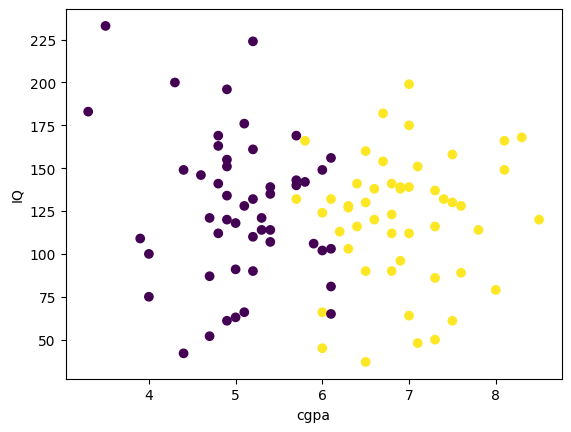

In [11]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel('cgpa')
plt.ylabel('IQ')

From above chart we can see that students having cgpa greater than 6 are more likely to get placed

In [12]:
# dependent and independent variable 
X = df[["cgpa", "iq"]]
y = df["placement"]

In [83]:
# train test split 

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.1)

In [84]:
# applyince scaling in training data
sc = StandardScaler()

In [85]:
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [69]:
# training model
model_lr =LogisticRegression()

In [88]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [89]:
# Evaluating model

model_lr.score(X_test, y_test)

1.0

predicting with new data

In [34]:
# predicting data 
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [90]:
sc.mean_

array([  5.98555556, 123.67777778])

In [96]:

new_data = [[7.4, 132.0]]

new_data

[[7.4, 132.0]]

In [97]:
scaled_new_data =sc.transform(new_data)
scaled_new_data

C:\Users\Vishnu Sah\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.21113969, 0.20545416]])

In [98]:
model_lr.predict(scaled_new_data)

array([1])

Saving scaler and model

In [99]:
import joblib

joblib.dump(model_lr,'placement_predictor.joblib')
joblib.dump(sc, 'scaler.joblib')

['scaler.joblib']

fetching model and predicting with new data

In [100]:
scaler = joblib.load("scaler.joblib")
model = joblib.load("placement_predictor.joblib")

In [107]:
scaled_data = scaler.transform([[6.5, 152]])
scaled_data

C:\Users\Vishnu Sah\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.44050092, 0.69920246]])

In [108]:
model.predict(scaled_data)

array([1])